In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;</style>"))
import os 
os.chdir("..")

from numerics.integration.matrices import *
from numerics.utilities.misc import *
import tensorflow as tf
from numerics.machine_learning.models import * 
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)


/tmp/ipykernel_408639/246515241.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


2022-05-16 17:33:10.495028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 17:33:10.515979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 17:33:10.516070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import matplotlib.pyplot as plt

In [3]:
params, exp_path = def_params()
xi, kappa, omega, eta = params
print(xi, kappa, omega, eta)
genoni_matrices(xi, kappa, omega, eta)


0.0 1 0.0 1


(array([[-0.5,  0. ],
        [-0. , -0.5]]),
 array([[1., 0.],
        [0., 1.]]),
 array([[-1., -0.],
        [-0., -0.]]),
 array([[-1., -0.],
        [-0., -0.]]))

In [ ]:
params, exp_path = def_params()
total_time = 20.
dt = 1e-1
states_si, dys_si = load(itraj=1, exp_path=exp_path, total_time=total_time, dt=dt, ext_signal=1)
#tfsignals = tf.convert_to_tensor(dys_si.astype(np.float32)[tf.newaxis])
times = get_time(total_time,dt).astype(np.float32)
dd = tf.unstack(dys_si.astype(np.float32),axis=1)

tfsignals = tf.stack([times[:-1],dd[0], dd[1]])
tfsignals = tf.transpose(tfsignals)[tf.newaxis]

In [ ]:
plt.plot(dd[0][:10000])

In [90]:
params, exp_path = def_params()

initial_parameters = np.array([1., 2*np.pi/10]).astype(np.float32)
true_parameters = np.array([10., 2*np.pi/10]).astype(np.float32)


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

BS = len(tfsignals[0])
model = Model(params=params, dt=dt, initial_parameters=initial_parameters,
              true_parameters=true_parameters, cov_in=covss, batch_size=(BS,None,3))
model.recurrent_layer.build(tf.TensorShape([1,None,3]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))

In [94]:
history = model.fit(x=tfsignals, y=tfsignals, batch_size=BS, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 60ms/step - LOSS: 75.5581 - PARAMS: 4.4503 - GRADS: -17.2870
Epoch 2/300
1/1 [==============================] - 0s 66ms/step - LOSS: 74.7908 - PARAMS: 4.4667 - GRADS: -16.8036
Epoch 3/300
1/1 [==============================] - 0s 63ms/step - LOSS: 74.0750 - PARAMS: 4.4827 - GRADS: -16.3304
Epoch 4/300
1/1 [==============================] - 0s 59ms/step - LOSS: 73.4077 - PARAMS: 4.4984 - GRADS: -15.8673
Epoch 5/300
1/1 [==============================] - 0s 61ms/step - LOSS: 72.7869 - PARAMS: 4.5138 - GRADS: -15.4140
Epoch 6/300
1/1 [==============================] - 0s 59ms/step - LOSS: 72.2102 - PARAMS: 4.5289 - GRADS: -14.9704
Epoch 7/300
1/1 [==============================] - 0s 66ms/step - LOSS: 71.6757 - PARAMS: 4.5436 - GRADS: -14.5365
Epoch 8/300
1/1 [==============================] - 0s 68ms/step - LOSS: 71.1817 - PARAMS: 4.5580 - GRADS: -14.1125
Epoch 9/300
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7248 

Epoch 143/300
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6966 - PARAMS: 5.0328 - GRADS: -0.0022
Epoch 144/300
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6977 - PARAMS: 5.0328 - GRADS: -0.0013
Epoch 145/300
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6985 - PARAMS: 5.0328 - GRADS: -2.2298e-04
Epoch 146/300
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6997 - PARAMS: 5.0328 - GRADS: 3.5781e-04
Epoch 147/300
1/1 [==============================] - 0s 64ms/step - LOSS: 70.7002 - PARAMS: 5.0329 - GRADS: 0.0012
Epoch 148/300
1/1 [==============================] - 0s 60ms/step - LOSS: 70.7011 - PARAMS: 5.0329 - GRADS: 0.0017
Epoch 149/300
1/1 [==============================] - 0s 63ms/step - LOSS: 70.7016 - PARAMS: 5.0329 - GRADS: 0.0023
Epoch 150/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7022 - PARAMS: 5.0329 - GRADS: 0.0028
Epoch 151/300
1/1 [==============================] - 0s 61ms/step - L

1/1 [==============================] - 0s 63ms/step - LOSS: 70.6996 - PARAMS: 5.0328 - GRADS: -1.5944e-04
Epoch 282/300
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6997 - PARAMS: 5.0328 - GRADS: 7.6801e-05
Epoch 283/300
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 284/300
1/1 [==============================] - 0s 68ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 285/300
1/1 [==============================] - 0s 68ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 286/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 287/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 288/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 289/300
1/1 [==============================] - 0s 68ms/

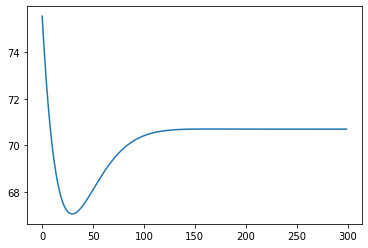

In [95]:
plt.plot(history.history["LOSS"])

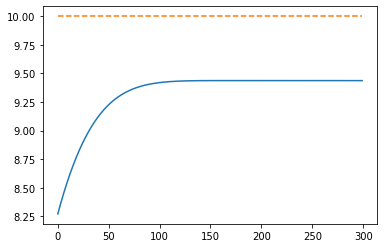

In [96]:
history_param = np.squeeze(history.history["PARAMS"])[:,0]
plt.plot(history_param)
plt.plot(np.ones(len(history_param))*true_parameters[0], '--')

In [109]:
preds = model(tfsignals)

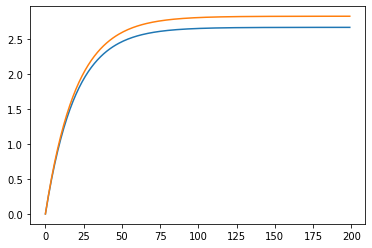

In [110]:

plt.plot(np.squeeze(preds)[:,0])
plt.plot(dd[0][:10000])

In [108]:
model.recurrent_layer.reset_states()

In [102]:
model.recurrent_layer.states

[<tf.Variable 'Variable:0' shape=(1, 5) dtype=float32, numpy=array([[0., 0., 0., 0., 0.]], dtype=float32)>]

In [111]:
inputs = tfsignals
dys = tfsignals[:,:,1:] ###recall first entry is time, then signals
with tf.GradientTape() as tape:
    tape.watch(model.trainable_variables)
    preds = model(inputs)
    diff = tf.squeeze(preds - dys)
    loss = tf.reduce_sum(tf.einsum('bj,bj->b',diff,diff))
grads = tape.gradient(loss, model.trainable_variables)
model.optimizer.apply_gradients(zip(grads, model.trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=401>

this shows that the gradient is very small !!! But what happens if we put some batch_size ?

[<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-242.99461,    0.     ]], dtype=float32)>]

In [114]:
params, exp_path = def_params()

initial_parameters = np.array([1., 2*np.pi/10]).astype(np.float32)
true_parameters = np.array([10., 2*np.pi/10]).astype(np.float32)


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

BS = 25#len(tfsignals[0])
model = Model(params=params, dt=dt, initial_parameters=initial_parameters,
              true_parameters=true_parameters, cov_in=covss, batch_size=(BS,None,3))
model.recurrent_layer.build(tf.TensorShape([1,None,3]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))

history = model.fit(x=tfsignals, y=tfsignals, batch_size=BS, epochs=300)

Epoch 1/300


/home/giq/.local/lib/python3.10/site-packages/keras/engine/training.py:2034: UserWarning: Metric Metrica implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1/1 [==============================] - 0s 433ms/step - LOSS: 1097.7369 - PARAMS: 0.8642 - GRADS: -122.2767
Epoch 2/300
1/1 [==============================] - 0s 66ms/step - LOSS: 1060.5663 - PARAMS: 0.9141 - GRADS: -120.1352
Epoch 3/300
1/1 [==============================] - 0s 67ms/step - LOSS: 1035.5077 - PARAMS: 0.9641 - GRADS: -118.6959
Epoch 4/300
1/1 [==============================] - 0s 62ms/step - LOSS: 1010.7839 - PARAMS: 1.0140 - GRADS: -117.2574
Epoch 5/300
1/1 [==============================] - 0s 61ms/step - LOSS: 986.3987 - PARAMS: 1.0638 - GRADS: -115.8201
Epoch 6/300
1/1 [==============================] - 0s 63ms/step - LOSS: 962.3562 - PARAMS: 1.1136 - GRADS: -114.3841
Epoch 7/300
1/1 [==============================] - 0s 59ms/step - LOSS: 938.6615 - PARAMS: 1.1634 - GRADS: -112.9501
Epoch 8/300
1/1 [==============================] - 0s 61ms/step - LOSS: 915.3179 - PARAMS: 1.2130 - GRADS: -111.5180
Epoch 9/300
1/1 [==============================] - 0s 62ms/step - LOSS:

1/1 [==============================] - 0s 63ms/step - LOSS: 137.4928 - PARAMS: 3.7797 - GRADS: -36.9602
Epoch 72/300
1/1 [==============================] - 0s 62ms/step - LOSS: 133.6807 - PARAMS: 3.8080 - GRADS: -36.1327
Epoch 73/300
1/1 [==============================] - 0s 59ms/step - LOSS: 130.0292 - PARAMS: 3.8359 - GRADS: -35.3175
Epoch 74/300
1/1 [==============================] - 0s 62ms/step - LOSS: 126.5335 - PARAMS: 3.8633 - GRADS: -34.5147
Epoch 75/300
1/1 [==============================] - 0s 61ms/step - LOSS: 123.1878 - PARAMS: 3.8903 - GRADS: -33.7240
Epoch 76/300
1/1 [==============================] - 0s 61ms/step - LOSS: 119.9891 - PARAMS: 3.9169 - GRADS: -32.9456
Epoch 77/300
1/1 [==============================] - 0s 61ms/step - LOSS: 116.9314 - PARAMS: 3.9431 - GRADS: -32.1794
Epoch 78/300
1/1 [==============================] - 0s 61ms/step - LOSS: 114.0108 - PARAMS: 3.9688 - GRADS: -31.4252
Epoch 79/300
1/1 [==============================] - 0s 65ms/step - LOSS: 111.

1/1 [==============================] - 0s 63ms/step - LOSS: 70.5514 - PARAMS: 5.0284 - GRADS: -0.1363
Epoch 212/300
1/1 [==============================] - 0s 64ms/step - LOSS: 70.5614 - PARAMS: 5.0287 - GRADS: -0.1270
Epoch 213/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.5708 - PARAMS: 5.0290 - GRADS: -0.1182
Epoch 214/300
1/1 [==============================] - 0s 63ms/step - LOSS: 70.5797 - PARAMS: 5.0293 - GRADS: -0.1096
Epoch 215/300
1/1 [==============================] - 0s 59ms/step - LOSS: 70.5883 - PARAMS: 5.0295 - GRADS: -0.1016
Epoch 216/300
1/1 [==============================] - 0s 63ms/step - LOSS: 70.5964 - PARAMS: 5.0298 - GRADS: -0.0942
Epoch 217/300
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6039 - PARAMS: 5.0300 - GRADS: -0.0871
Epoch 218/300
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6112 - PARAMS: 5.0302 - GRADS: -0.0804
Epoch 219/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6179 - PA

Epoch 282/300
1/1 [==============================] - 0s 65ms/step - LOSS: 70.7037 - PARAMS: 5.0329 - GRADS: 0.0037
Epoch 283/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7035 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 284/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 285/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 286/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7030 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 287/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7029 - PARAMS: 5.0329 - GRADS: 0.0028
Epoch 288/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7027 - PARAMS: 5.0329 - GRADS: 0.0028
Epoch 289/300
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7026 - PARAMS: 5.0329 - GRADS: 0.0026
Epoch 290/300
1/1 [==============================] - 0s 62ms/step - LOSS: 70.702

In [118]:
model.reset_states()

In [119]:
preds = model(tfsignals)

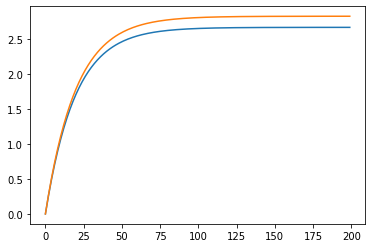

In [117]:
preds = model(tfsignals)
plt.plot(np.squeeze(preds)[:,0])
plt.plot(dd[0][:10000])

In [121]:
model.reset_states()

In [125]:
datas = tf.split(tfsignals, 8, axis=1)

In [128]:
def train_step(model, datas):
    inputs = tfsignals
    dys = tfsignals[:,:,1:] ###recall first entry is time, then signals
    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        preds = model(inputs)
        diff = tf.squeeze(preds - dys)
        loss = tf.reduce_sum(tf.einsum('bj,bj->b',diff,diff))
    grads = tape.gradient(loss, model.trainable_variables)
    #model.optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss, grads

In [130]:
train_step(model, datas[-1])

(<tf.Tensor: shape=(), dtype=float32, numpy=3.9907935>,
 [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-14.709137,   0.      ]], dtype=float32)>])

In [131]:
train_step(model, datas[0])

(<tf.Tensor: shape=(), dtype=float32, numpy=70.6962>,
 [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.00171471, 0.        ]], dtype=float32)>])

In [135]:
params, exp_path = def_params()

initial_parameters = np.array([1., 2*np.pi/10]).astype(np.float32)
true_parameters = np.array([10., 2*np.pi/10]).astype(np.float32)


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

BS = 25#len(tfsignals[0])
model = Model(params=params, dt=dt, initial_parameters=initial_parameters,
              true_parameters=true_parameters, cov_in=covss, batch_size=(BS,None,3))
model.recurrent_layer.build(tf.TensorShape([1,None,3]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))

history = model.fit(x=tfsignals, y=tfsignals, batch_size=BS, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 426ms/step - LOSS: 1097.7369 - PARAMS: 0.8642 - GRADS: -122.2767
Epoch 2/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 1060.5663 - PARAMS: 0.9141 - GRADS: -120.1352
Epoch 3/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 1035.5077 - PARAMS: 0.9641 - GRADS: -118.6959
Epoch 4/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 1010.7839 - PARAMS: 1.0140 - GRADS: -117.2574
Epoch 5/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 986.3987 - PARAMS: 1.0638 - GRADS: -115.8201
Epoch 6/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 962.3562 - PARAMS: 1.1136 - GRADS: -114.3841
Epoch 7/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 938.6615 - PARAMS: 1.1634 - GRADS: -112.9501
Epoch 8/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 915.3179 - PARAMS: 1.2130 - GRADS: -111.5180
Epoch 9/1000
1/1 [==============================] -

1/1 [==============================] - 0s 64ms/step - LOSS: 67.3001 - PARAMS: 4.8647 - GRADS: -5.0338
Epoch 140/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.3538 - PARAMS: 4.8709 - GRADS: -4.8501
Epoch 141/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.4114 - PARAMS: 4.8769 - GRADS: -4.6721
Epoch 142/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 67.4715 - PARAMS: 4.8827 - GRADS: -4.4993
Epoch 143/1000
1/1 [==============================] - 0s 66ms/step - LOSS: 67.5342 - PARAMS: 4.8883 - GRADS: -4.3315
Epoch 144/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 67.5997 - PARAMS: 4.8938 - GRADS: -4.1691
Epoch 145/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.6666 - PARAMS: 4.8991 - GRADS: -4.0115
Epoch 146/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.7356 - PARAMS: 4.9042 - GRADS: -3.8591
Epoch 147/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 67.8

1/1 [==============================] - 0s 61ms/step - LOSS: 70.7041 - PARAMS: 5.0329 - GRADS: 0.0042
Epoch 280/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7040 - PARAMS: 5.0329 - GRADS: 0.0039
Epoch 281/1000
1/1 [==============================] - 0s 65ms/step - LOSS: 70.7038 - PARAMS: 5.0329 - GRADS: 0.0039
Epoch 282/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.7037 - PARAMS: 5.0329 - GRADS: 0.0037
Epoch 283/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7035 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 284/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 285/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 286/1000
1/1 [==============================] - 0s 65ms/step - LOSS: 70.7030 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 287/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.7029 - PA

1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 417/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 418/1000
1/1 [==============================] - 0s 66ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 419/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 420/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 421/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 422/1000
1/1 [==============================] - 0s 65ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 423/1000
1/1 [==============================] - 0s 64ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 424/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 553/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 554/1000
1/1 [==============================] - 0s 67ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 555/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 556/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 557/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 558/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 559/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 560/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 689/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 690/1000
1/1 [==============================] - 0s 67ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 691/1000
1/1 [==============================] - 0s 67ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 692/1000
1/1 [==============================] - 0s 67ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 693/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 694/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 695/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 696/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 825/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 826/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 827/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 828/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 829/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 830/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 831/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 832/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 69ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 961/1000
1/1 [==============================] - 0s 64ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 962/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 963/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 964/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 965/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 966/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 967/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 968/1000
1/1 [==============================] - 0

In [136]:
model.reset_states()

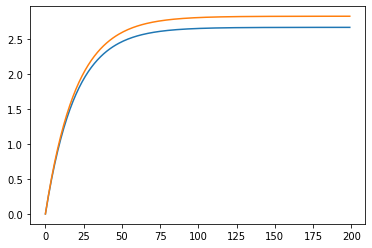

In [137]:
preds = model(tfsignals)
plt.plot(np.squeeze(preds)[:,0])
plt.plot(dd[0][:10000])

In [138]:
model.trainable_variables

[<tf.Variable 'gr_cell_15/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[9.437286  , 0.62831855]], dtype=float32)>]

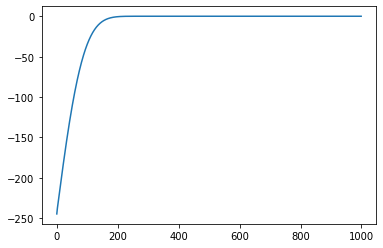

In [144]:
plt.plot(np.squeeze(history.history["GRADS"])[:,0])

In [145]:
params, exp_path = def_params()

initial_parameters = np.array([1., 2*np.pi/10]).astype(np.float32)
true_parameters = np.array([10., 2*np.pi/10]).astype(np.float32)


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

BS = 1#25#len(tfsignals[0])
model = Model(params=params, dt=dt, initial_parameters=initial_parameters,
              true_parameters=true_parameters, cov_in=covss, batch_size=(BS,None,3))
model.recurrent_layer.build(tf.TensorShape([1,None,3]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))

history = model.fit(x=tfsignals, y=tfsignals, batch_size=BS, epochs=1000)

Epoch 1/1000


/home/giq/.local/lib/python3.10/site-packages/keras/engine/training.py:2034: UserWarning: Metric Metrica implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1/1 [==============================] - 1s 679ms/step - LOSS: 1097.7369 - PARAMS: 0.8642 - GRADS: -122.2767
Epoch 2/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 1060.5663 - PARAMS: 0.9141 - GRADS: -120.1352
Epoch 3/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 1035.5077 - PARAMS: 0.9641 - GRADS: -118.6959
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 1010.7839 - PARAMS: 1.0140 - GRADS: -117.2574
Epoch 5/1000
1/1 [==============================] - 0s 57ms/step - LOSS: 986.3987 - PARAMS: 1.0638 - GRADS: -115.8201
Epoch 6/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 962.3562 - PARAMS: 1.1136 - GRADS: -114.3841
Epoch 7/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 938.6615 - PARAMS: 1.1634 - GRADS: -112.9501
Epoch 8/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 915.3179 - PARAMS: 1.2130 - GRADS: -111.5180
Epoch 9/1000
1/1 [==============================] - 0s 57ms/step

1/1 [==============================] - 0s 60ms/step - LOSS: 67.3001 - PARAMS: 4.8647 - GRADS: -5.0338
Epoch 140/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.3538 - PARAMS: 4.8709 - GRADS: -4.8501
Epoch 141/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 67.4114 - PARAMS: 4.8769 - GRADS: -4.6721
Epoch 142/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 67.4715 - PARAMS: 4.8827 - GRADS: -4.4993
Epoch 143/1000
1/1 [==============================] - 0s 64ms/step - LOSS: 67.5342 - PARAMS: 4.8883 - GRADS: -4.3315
Epoch 144/1000
1/1 [==============================] - 0s 64ms/step - LOSS: 67.5997 - PARAMS: 4.8938 - GRADS: -4.1691
Epoch 145/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 67.6666 - PARAMS: 4.8991 - GRADS: -4.0115
Epoch 146/1000
1/1 [==============================] - 0s 65ms/step - LOSS: 67.7356 - PARAMS: 4.9042 - GRADS: -3.8591
Epoch 147/1000
1/1 [==============================] - 0s 64ms/step - LOSS: 67.8

1/1 [==============================] - 0s 63ms/step - LOSS: 70.7041 - PARAMS: 5.0329 - GRADS: 0.0042
Epoch 280/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7040 - PARAMS: 5.0329 - GRADS: 0.0039
Epoch 281/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.7038 - PARAMS: 5.0329 - GRADS: 0.0039
Epoch 282/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.7037 - PARAMS: 5.0329 - GRADS: 0.0037
Epoch 283/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7035 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 284/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0034
Epoch 285/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.7032 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 286/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.7030 - PARAMS: 5.0329 - GRADS: 0.0031
Epoch 287/1000
1/1 [==============================] - 0s 67ms/step - LOSS: 70.7029 - PA

1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 417/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 418/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 419/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 420/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 421/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 422/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 423/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 424/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 553/1000
1/1 [==============================] - 0s 57ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 554/1000
1/1 [==============================] - 0s 56ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 555/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 556/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 557/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 558/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 559/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 560/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 689/1000
1/1 [==============================] - 0s 62ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 690/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 691/1000
1/1 [==============================] - 0s 57ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 692/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 693/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 694/1000
1/1 [==============================] - 0s 61ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 695/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 696/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 825/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 826/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 827/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 828/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 829/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 830/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 831/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 832/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 961/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 962/1000
1/1 [==============================] - 0s 63ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 963/1000
1/1 [==============================] - 0s 60ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 964/1000
1/1 [==============================] - 0s 65ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 965/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 966/1000
1/1 [==============================] - 0s 58ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 967/1000
1/1 [==============================] - 0s 59ms/step - LOSS: 70.6999 - PARAMS: 5.0328 - GRADS: 7.9185e-05
Epoch 968/1000
1/1 [==============================] - 0

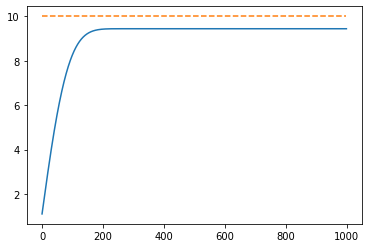

In [146]:
history_param = np.squeeze(history.history["PARAMS"])[:,0]
plt.plot(history_param)
plt.plot(np.ones(len(history_param))*true_parameters[0], '--')

In [148]:
model.reset_states()

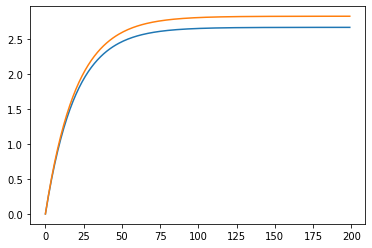

In [149]:
preds = model(tfsignals)
plt.plot(np.squeeze(preds)[:,0])
plt.plot(dd[0][:10000])

In [150]:
kappa

1